In [26]:
import requests
resp = requests.get('https://api.cryptowat.ch/markets/bitfinex/btcusd/summary')
resp.ok # Was it successful?

True

Use resp.json() to return the call to the cryptowatch api

In [27]:
resp.json()

{'result': {'price': {'last': 6888,
   'high': 6985,
   'low': 6595,
   'change': {'percentage': 0.0164089245661669, 'absolute': 111.2}},
  'volume': 5731.68205799,
  'volumeQuote': 39347851.12533931},
 'allowance': {'cost': 5904703,
  'remaining': 3942595507,
  'remainingPaid': 0,
  'upgrade': 'Upgrade for a higher allowance, starting at $15/month for 16 seconds/hour. https://cryptowat.ch/pricing'}}

Let's save that to a document

In [28]:
doc = resp.json()

In [29]:
print(f"Bitfinex (BTC/USD)")
print(f"Price: {doc['result']['price']['last']:.2f}")
print(f"Volume: {doc['result']['volume']:.2f}")

Bitfinex (BTC/USD)
Price: 6888.00
Volume: 5731.68


In [30]:
coinbase_url = 'https://api.cryptowat.ch/markets/coinbase-pro/btcusd/summary'
resp = requests.get(coinbase_url)
resp.json()

{'result': {'price': {'last': 6893.22,
   'high': 6997.38,
   'low': 6585.03,
   'change': {'percentage': 0.0166001539673129, 'absolute': 112.56}},
  'volume': 14548.92738349,
  'volumeQuote': 100061387.88775468},
 'allowance': {'cost': 3932522,
  'remaining': 3938662985,
  'remainingPaid': 0,
  'upgrade': 'Upgrade for a higher allowance, starting at $15/month for 16 seconds/hour. https://cryptowat.ch/pricing'}}

In [32]:
kraken_url = 'https://api.cryptowat.ch/markets/kraken/btcusd/summary'
resp = requests.get(kraken_url)
resp.json()

{'result': {'price': {'last': 6896.9,
   'high': 6985,
   'low': 6626.8,
   'change': {'percentage': 0.0170618769539315, 'absolute': 115.7}},
  'volume': 7149.20069294,
  'volumeQuote': 49153452.66705333},
 'allowance': {'cost': 1873236,
  'remaining': 3936789749,
  'remainingPaid': 0,
  'upgrade': 'Upgrade for a higher allowance, starting at $15/month for 16 seconds/hour. https://cryptowat.ch/pricing'}}

In [33]:
# How many endpoints does Cryptowatch support?
exch_url = 'https://api.cryptowat.ch/exchanges'
resp = requests.get(exch_url)
doc = resp.json()

# View three markets
doc['result'][:3]

[{'id': 1,
  'symbol': 'bitfinex',
  'name': 'Bitfinex',
  'route': 'https://api.cryptowat.ch/exchanges/bitfinex',
  'active': True},
 {'id': 16,
  'symbol': 'bitmex',
  'name': 'BitMEX',
  'route': 'https://api.cryptowat.ch/exchanges/bitmex',
  'active': True},
 {'id': 18,
  'symbol': 'huobi',
  'name': 'Huobi',
  'route': 'https://api.cryptowat.ch/exchanges/huobi',
  'active': True}]

In [34]:
# What is this syntax even
doc['result'][0]['name']
doc['result'][5]['name']

# Ok, so to access one of the dictionaries, you access
# doc contains a list with index 'result': doc['result']
# then you access the index of the dictionary inside the result
# and then the key 'name' for the dictionary at that index

type(doc)# doc is a dict
type(doc['result']) # 'result' is a list in doc
type(doc['result'][4]) # 4 is a dictionary at index 4 in the list 'result' in dict doc
type(doc['result'][4]['name']) # 'name' is a str key in the dictionary at index 4 in the list 'result' in dict doc

doc['result'][2]['name']

'Huobi'

In [35]:
# List all markets with a loop
for exchange in doc['result']:
    print(f"{exchange['name']}")

Bitfinex
BitMEX
Huobi
Bisq
OKCoin
796
BitVC
Poloniex
Quoine
BTC China
QuadrigaCX
Bitstamp
CEX.IO
Liquid
Bithumb
Binance.US
Bittrex
Coinone
Bit-Z
BitBay
HitBTC
bitFlyer
Vault of Satoshi
Luno
Mt. Gox
Binance
Gate.io
DEX (aggregated)
Coinbase Pro
Cryptsy
Gemini
meXBT
Okex
Kraken
WEX
Kraken Futures


## Getting historic Bitcoin prices
The endpoint that returns that data is ohlc 

e.g. 'https://api.cryptowat.ch/markets/bitfinex/btcusd/ohlc'

The returned json document is huge and it includes historic prices with different periodicity; for example, every minute, every 5 minutes, every hour or every day. 

In [37]:
url = 'https://api.cryptowat.ch/markets/kraken/btcusd/ohlc'
resp = requests.get(url)
doc = resp.json()

Each value is a list that contains:

- Timestamp (expressed as unix epoch) 
- Open Price
- High Price
- Low Price
- Close Price
- Volume
- Not used (I don't know what this is)

In [38]:
periods = {
    '60': '1m',  # 1 Minute
    '180': '3m', # 3 Minutes
    '300': '5m',
    '900': '15m',
    '1800': '30m',
    '3600': '1h', # 1 Hour
    '7200': '2h',
    '14400': '4h',
    '21600': '6h',
    '43200': '12h',
    '86400': '1d', # 1 Day
    '259200': '3d',
    '604800': '1w', # 1 Week
}

In [39]:
doc['result']['86400'][:3] # return data from 1day timeperiod, three times

[[1381190400, 123.61, 123.61, 123.61, 123.61, 0.1, 0.0],
 [1381276800, 123.61, 124.19, 123.9, 124.18, 3.9916, 0.0],
 [1381363200, 124.18, 124.01687, 123.84, 123.84, 2.823, 0.0]]

In [40]:
from datetime import datetime

In [41]:
price = doc['result']['86400'][0]
price

[1381190400, 123.61, 123.61, 123.61, 123.61, 0.1, 0.0]

In [42]:
datetime.fromtimestamp(price[0])

datetime.datetime(2013, 10, 8, 1, 0)

In [43]:
print(f"{datetime.fromtimestamp(price[0])} - Close Price: ${price[-3]:.2f}, Volume: {price[-2]:.2f}")

2013-10-08 01:00:00 - Close Price: $123.61, Volume: 0.10


In [44]:
for period, label in periods.items():
    if period in doc['result']:
        prices = doc['result'][period]
        print(f'Period {label}: ')
        print('-' * 70)
        for price in prices[:3]:
            dt = datetime.fromtimestamp(price[0])#.strftime('%Y-%m-%d')
            print(f"{dt} | Price: {price[-2]:<15.2f} - Volume: {price[-1]:<15.2f}")
        print("")

Period 1m: 
----------------------------------------------------------------------
2020-04-14 03:18:00 | Price: 2.00            - Volume: 13750.60       
2020-04-14 03:19:00 | Price: 0.01            - Volume: 53.21          
2020-04-14 03:20:00 | Price: 3.00            - Volume: 20622.90       

Period 3m: 
----------------------------------------------------------------------
2020-04-12 18:27:00 | Price: 6.60            - Volume: 47039.26       
2020-04-12 18:30:00 | Price: 24.69           - Volume: 175960.89      
2020-04-12 18:33:00 | Price: 14.75           - Volume: 104942.55      

Period 5m: 
----------------------------------------------------------------------
2020-04-11 09:10:00 | Price: 17.83           - Volume: 122612.26      
2020-04-11 09:15:00 | Price: 27.22           - Volume: 187555.46      
2020-04-11 09:20:00 | Price: 15.98           - Volume: 110089.16      

Period 15m: 
----------------------------------------------------------------------
2020-04-04 10:45:00 | Pri

In [45]:
import pandas as pd

In [46]:
url

'https://api.cryptowat.ch/markets/kraken/btcusd/ohlc'

In [47]:
periods = '3600' # Looking at 1hr periods
params = {'periods': periods}
resp = requests.get(url, params)
resp.ok

True

In [48]:
data = resp.json()

In [49]:
df = pd.DataFrame(data['result'][periods], columns=[
    'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'
])

df.head()

,CloseTime,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
0,1583298000,8786.4,8835.2,8786.4,8826.3,90.536991,7.973815e+05
1,1583301600,8823.8,8844.0,8806.3,8843.9,133.844098,1.181327e+06
2,1583305200,8844.0,8844.0,8781.5,8791.5,113.930426,1.003773e+06
3,1583308800,8793.5,8828.7,8791.9,8818.4,22.721238,2.003020e+05
4,1583312400,8825.8,8830.0,8798.3,8820.6,70.941051,6.247732e+05


In [50]:
df.drop(columns=['NA'],inplace=True)

In [51]:
df.info() # datetime is now an int

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CloseTime   1000 non-null   int64  
 1   OpenPrice   1000 non-null   float64
 2   HighPrice   1000 non-null   float64
 3   LowPrice    1000 non-null   float64
 4   ClosePrice  1000 non-null   float64
 5   Volume      1000 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 47.0 KB


In [52]:
df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
df.head()

,CloseTime,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume
0,2020-03-04 05:00:00,8786.4,8835.2,8786.4,8826.3,90.536991
1,2020-03-04 06:00:00,8823.8,8844.0,8806.3,8843.9,133.844098
2,2020-03-04 07:00:00,8844.0,8844.0,8781.5,8791.5,113.930426
3,2020-03-04 08:00:00,8793.5,8828.7,8791.9,8818.4,22.721238
4,2020-03-04 09:00:00,8825.8,8830.0,8798.3,8820.6,70.941051


In [53]:
df.set_index('CloseTime',inplace=True)

In [54]:
df.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume
CloseTime,,,,,
2020-03-04 05:00:00,8786.4,8835.2,8786.4,8826.3,90.536991
2020-03-04 06:00:00,8823.8,8844.0,8806.3,8843.9,133.844098
2020-03-04 07:00:00,8844.0,8844.0,8781.5,8791.5,113.930426
2020-03-04 08:00:00,8793.5,8828.7,8791.9,8818.4,22.721238
2020-03-04 09:00:00,8825.8,8830.0,8798.3,8820.6,70.941051


In [55]:
import matplotlib.pyplot as plt
%matplotlib inline

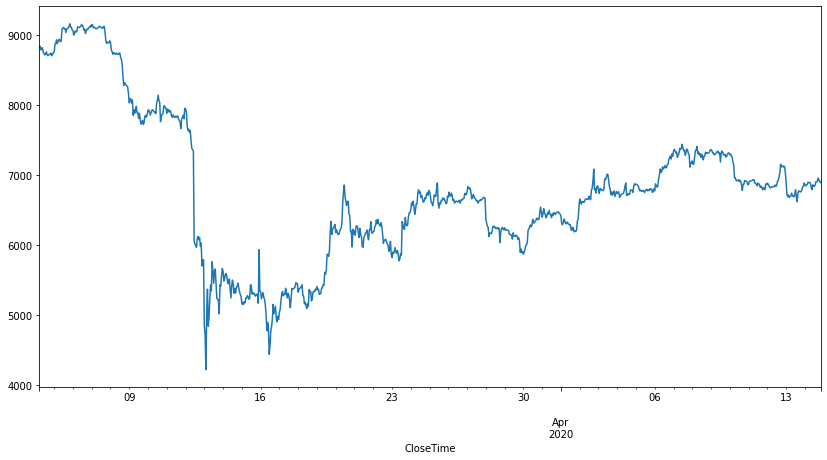

In [56]:
df['ClosePrice'].plot(figsize=(14,7))

In [57]:
price = df[['ClosePrice']].copy()
price.head()

,ClosePrice
CloseTime,
2020-03-04 05:00:00,8826.3
2020-03-04 06:00:00,8843.9
2020-03-04 07:00:00,8791.5
2020-03-04 08:00:00,8818.4
2020-03-04 09:00:00,8820.6


In [58]:
price.columns=['Price']
price.head()

,Price
CloseTime,
2020-03-04 05:00:00,8826.3
2020-03-04 06:00:00,8843.9
2020-03-04 07:00:00,8791.5
2020-03-04 08:00:00,8818.4
2020-03-04 09:00:00,8820.6


In [59]:
# Rolling mean
price['MovingMean'] = price['Price'].rolling(90).mean() # 90 periods (ours is hourly) over which to compute rolling mean
price[95:99]

,Price,MovingMean
CloseTime,,
2020-03-08 04:00:00,8753.9,8993.896667
2020-03-08 05:00:00,8747.2,8993.994444
2020-03-08 06:00:00,8732.0,8994.121111
2020-03-08 07:00:00,8729.0,8994.110000


## Plot of moving mean over 90hr periods 

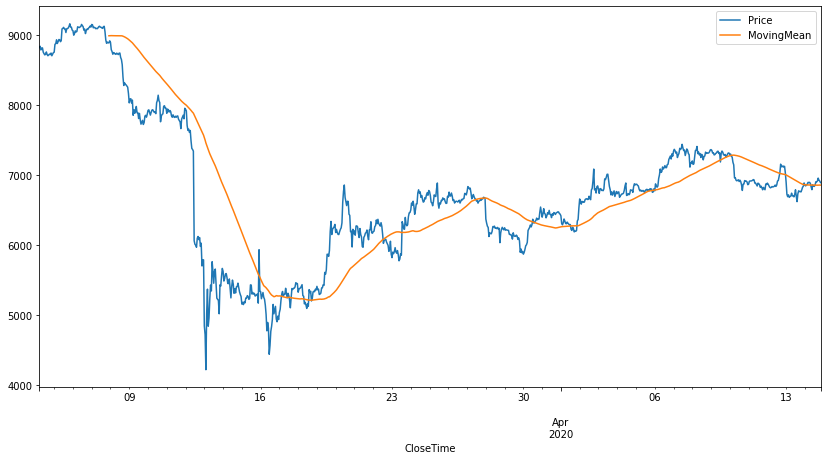

In [60]:
price.plot(figsize=(14,7))

### Moving standard deviation

In [61]:
price['MovingStd'] = price['Price'].rolling(90).std()
price[90:95]

,Price,MovingMean,MovingStd
CloseTime,,,
2020-03-07 23:00:00,8921.5,8994.872222,148.058406
2020-03-08 00:00:00,8899.5,8995.490000,147.536469
2020-03-08 01:00:00,8794.9,8995.527778,147.484075
2020-03-08 02:00:00,8768.4,8994.972222,148.250970
2020-03-08 03:00:00,8729.9,8993.964444,149.750330


In [62]:
# Bollinger Bands are two std dev above and below the moving mean
price['UpperBand'] = price['MovingMean'] + (2 * price['MovingStd'])
price['LowerBand'] = price['MovingMean'] - (2 * price['MovingStd'])

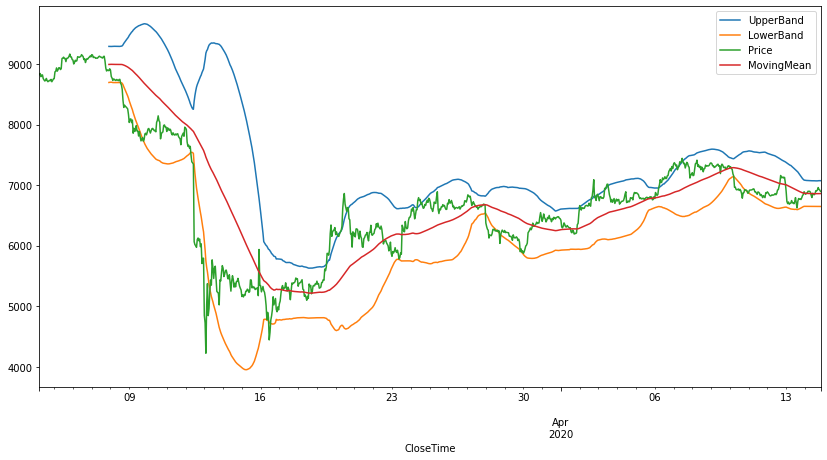

In [63]:
price[['UpperBand', 'LowerBand', 'Price', 'MovingMean']].plot(figsize=(14,7))

In [64]:
df.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume
CloseTime,,,,,
2020-03-04 05:00:00,8786.4,8835.2,8786.4,8826.3,90.536991
2020-03-04 06:00:00,8823.8,8844.0,8806.3,8843.9,133.844098
2020-03-04 07:00:00,8844.0,8844.0,8781.5,8791.5,113.930426
2020-03-04 08:00:00,8793.5,8828.7,8791.9,8818.4,22.721238
2020-03-04 09:00:00,8825.8,8830.0,8798.3,8820.6,70.941051


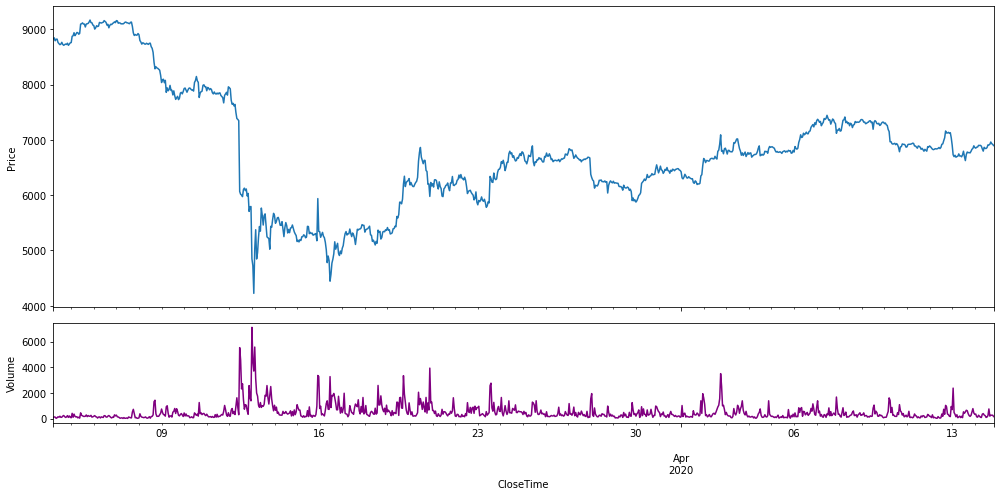

In [65]:
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True,figsize=(14,7), gridspec_kw ={'height_ratios':[3,1]})
df['ClosePrice'].plot(ax=ax1)
ax1.set_xlabel('Close Time')
ax1.set_ylabel('Price')

df['Volume'].plot(ax=ax2, color='purple')
ax2.set_ylabel('Volume')

fig.tight_layout()

In [66]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

output_notebook()

Loading BokehJS ...

In [67]:
TOOLS = "pan,wheel_zoom,box_zoom,reset,save"

p = figure(x_axis_type="datetime", tools=TOOLS, plot_width=700, title = "BTC Candlestick", x_range=(df.index[-250], df.index[-1]))
p.grid.grid_line_alpha=0.3

inc = df['ClosePrice'] > df['OpenPrice']
dec = df['OpenPrice'] > df['ClosePrice']
w = 12 * 60 * 60 * 80

p.segment(df.index, df['HighPrice'], df.index, df['LowPrice'], color="black")
p.vbar(df.index[inc], w, df.OpenPrice[inc], df.ClosePrice[inc], fill_color="#00af50", line_color="black")
p.vbar(df.index[dec], w, df.OpenPrice[dec], df.ClosePrice[dec], fill_color="#F2583E", line_color="black")

show(p)